# Filip Kucia

# 4.0.1

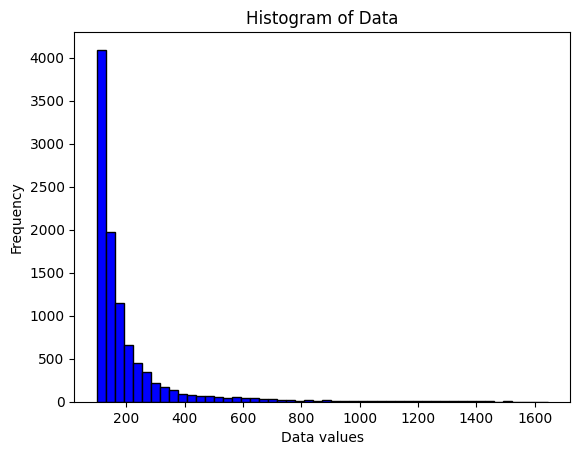

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

data = list(dict(nx.generators.barabasi_albert_graph(10000, 100).degree).values())
# Draw histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')
plt.xlabel("Data values")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()


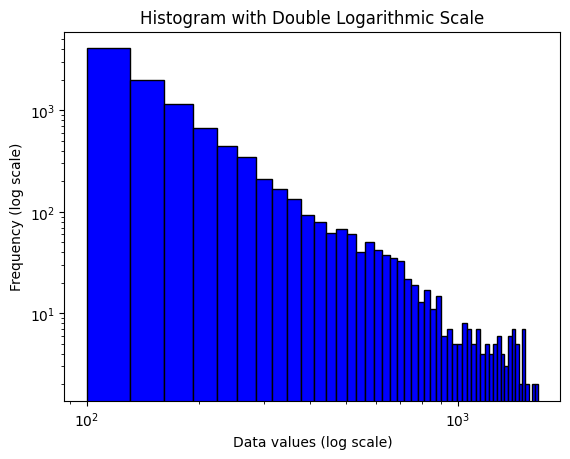

In [36]:
plt.hist(data, bins=50, color='blue', edgecolor='black')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Data values (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram with Double Logarithmic Scale")
plt.show()


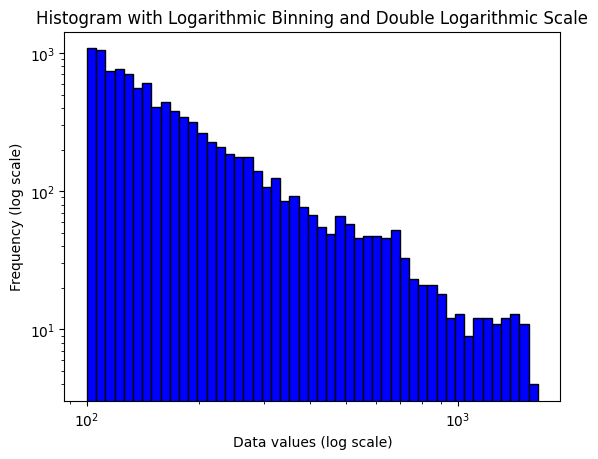

In [37]:
# Create logarithmic bins
bins = np.logspace(np.log10(min(data)), np.log10(max(data)), 50)

# Plot histogram with logarithmic bins
plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Data values (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram with Logarithmic Binning and Double Logarithmic Scale")
plt.show()


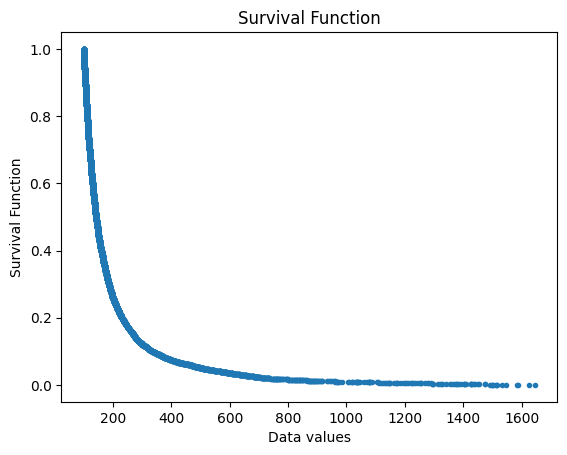

In [38]:
# Sort data and calculate survival function
data_sorted = np.sort(data)
survival_func = 1 - np.arange(len(data_sorted)) / len(data_sorted)

# Plot survival function with log-log scale
plt.plot(data_sorted, survival_func, marker='o', linestyle='none', markersize=3)

plt.xlabel("Data values")
plt.ylabel("Survival Function")
plt.title("Survival Function")
plt.show()

In [39]:
import numpy as np
from scipy.stats import linregress

# Sort data in ascending order
data_sorted = np.sort(data)

# Log-transform the data
log_x = np.log10(data_sorted[data_sorted > 0])  # Filter to avoid log(0)
log_y = np.log10(np.arange(1, len(data_sorted) + 1) / len(data_sorted))

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
alpha_estimate = -slope  # Alpha is the negative slope

print(f"Estimated α from linear regression: {alpha_estimate}")


Estimated α from linear regression: -1.3028028568436612


In [40]:
xmin = min(data_sorted)  # Assuming xmin is the minimum of the sorted data
data_above_xmin = data_sorted[data_sorted >= xmin]

# Apply the MLE formula
n = len(data_above_xmin)
alpha_mle = 1 + n / np.sum(np.log(data_above_xmin / xmin))

print(f"MLE Estimated α with known xmin: {alpha_mle}")


MLE Estimated α with known xmin: 2.949718797110936


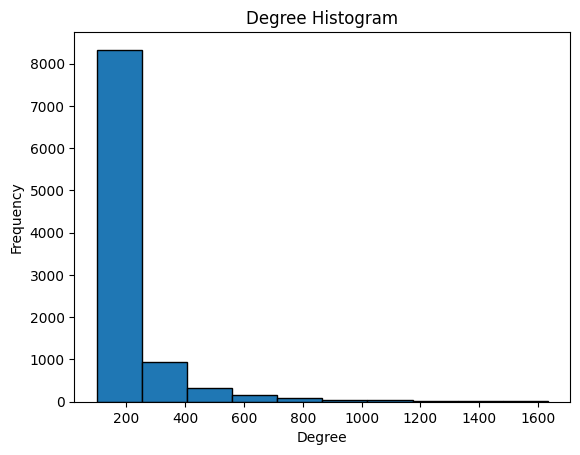

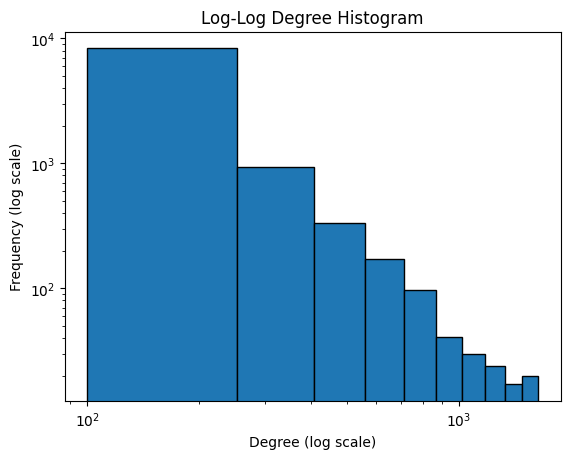

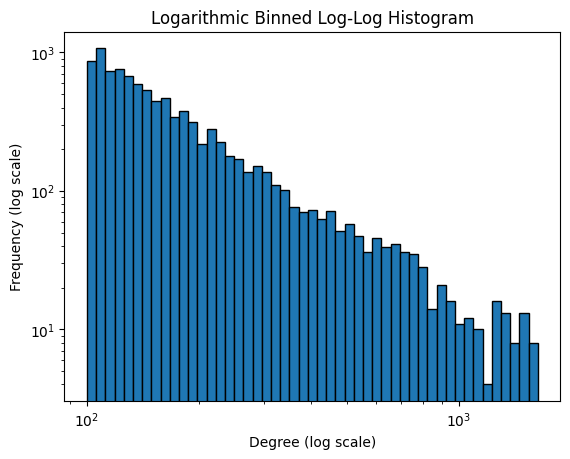

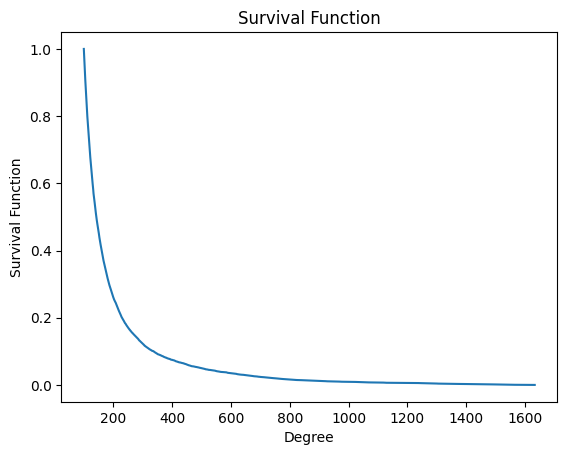

Linear Regression Coefficient (slope): -1.8001093927062026
Linear Regression Intercept: 15.17877020304153


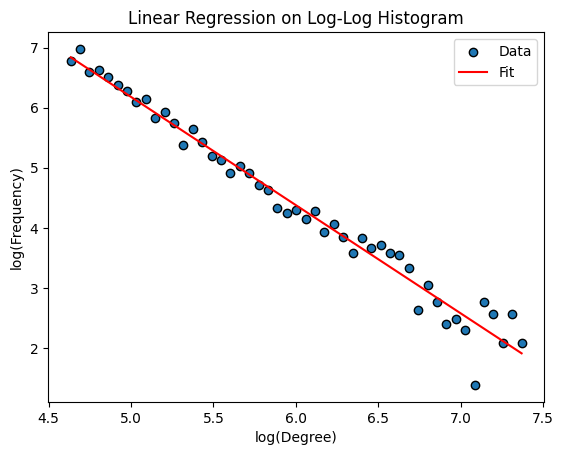

MLE estimator for α: 2.9499782469436893


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.linear_model import LinearRegression

class GraphAnalysis:
    def __init__(self, graph):
        self.graph = graph
        self.obs = list(dict(graph.degree()).values())
        self.loglog_hist = None
        self.model = None

    def plot_histogram(self):
        plt.figure()
        plt.hist(self.obs, edgecolor='black')
        plt.title('Degree Histogram')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.show()

    def plot_loglog_histogram(self):
        plt.figure()
        plt.hist(self.obs, edgecolor='black')
        plt.yscale('log')
        plt.xscale('log')
        plt.title('Log-Log Degree Histogram')
        plt.xlabel('Degree (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.show()

    def apply_logarithmic_binning(self, num_bins=50):
        plt.figure()
        bins = np.exp(np.linspace(np.log(min(self.obs)), np.log(max(self.obs)), num_bins))
        self.loglog_hist = plt.hist(self.obs, bins=bins, edgecolor='black')
        plt.yscale('log')
        plt.xscale('log')
        plt.title('Logarithmic Binned Log-Log Histogram')
        plt.xlabel('Degree (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.show()

    def survival(self, x):
        # Cumulative distribution function
        cdf = len(list(filter(lambda v: v < x, self.obs))) / len(self.obs)
        return 1 - cdf

    def compute_survival_function(self):
        x_to_plot = np.unique(self.obs)
        y_to_plot = [self.survival(x) for x in x_to_plot]
        plt.figure()
        plt.plot(x_to_plot, y_to_plot)
        plt.title('Survival Function')
        plt.xlabel('Degree')
        plt.ylabel('Survival Function')
        plt.show()

    def linear_regression(self):
        if self.loglog_hist is None:
            self.apply_logarithmic_binning()
        frequencies = self.loglog_hist[0]
        bin_edges = self.loglog_hist[1]
        bin_centers = np.array([(a + b) / 2 for a, b in zip(bin_edges[:-1], bin_edges[1:])])
        log_x = np.log(bin_centers).reshape(-1, 1)
        log_y = np.log(frequencies).reshape(-1, 1)
        self.model = LinearRegression(fit_intercept=True).fit(log_x, log_y)
        print("Linear Regression Coefficient (slope):", self.model.coef_[0][0])
        print("Linear Regression Intercept:", self.model.intercept_[0])
        plt.figure()
        plt.scatter(log_x, log_y, label='Data', edgecolor='black')
        plt.plot(log_x, self.model.predict(log_x), color='red', label='Fit')
        plt.xlabel('log(Degree)')
        plt.ylabel('log(Frequency)')
        plt.title('Linear Regression on Log-Log Histogram')
        plt.legend()
        plt.show()

    def compute_mle(self):
        x_min = min(self.obs)
        n = len(self.obs)
        sum_logs = sum(np.log(np.array(self.obs) / x_min))
        alpha_mle = 1 + n / sum_logs
        print("MLE estimator for α:", alpha_mle)
        return alpha_mle

    def run_all(self):
        self.plot_histogram()
        self.plot_loglog_histogram()
        self.apply_logarithmic_binning()
        self.compute_survival_function()
        self.linear_regression()
        self.compute_mle()

# Example usage:
if __name__ == '__main__':
    G = nx.generators.barabasi_albert_graph(10000, 100)
    analysis = GraphAnalysis(G)
    analysis.run_all()


## 4.3

In [42]:
def average_degree(G: nx.Graph, k: int): 
    degrees = dict(G.degree)
    nodes_having_k_degree = [n for n, v in degrees.items() if v == k] # collecting nodes having k-th degree
    averages = [np.sum([degrees[i] for i in G.neighbors(node)]) / k for node in nodes_having_k_degree]
    
    return np.mean(np.array(averages))

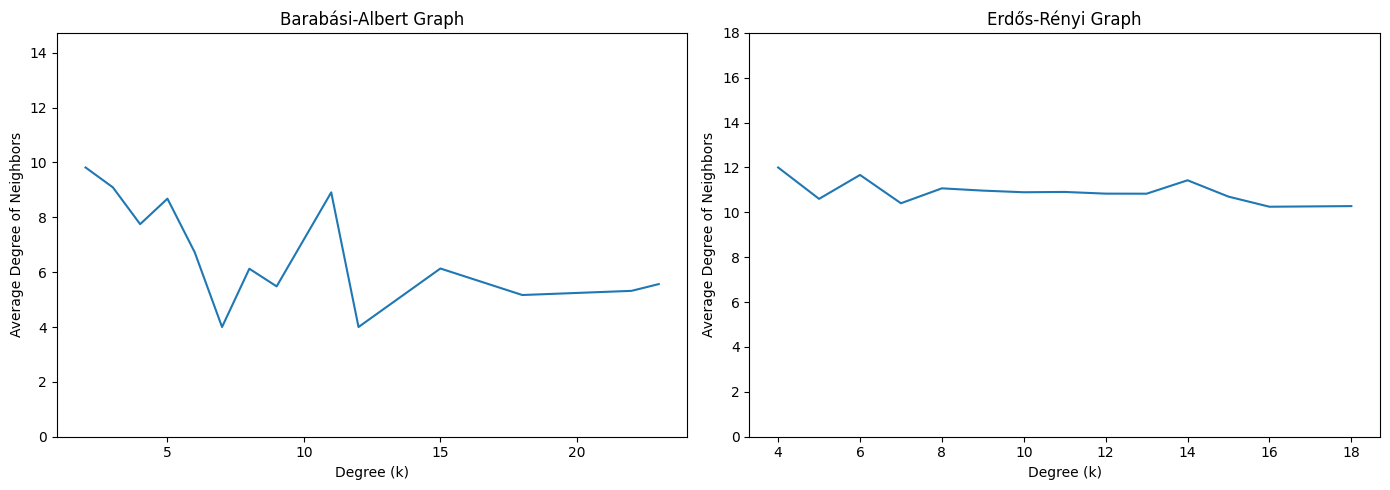

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barabási-Albert graph (Scale-Free Network)
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
G1 = nx.barabasi_albert_graph(n, m)

unique_degrees = np.unique(list(dict(G1.degree).values()))
av_degrees = [average_degree(G1, k) for k in unique_degrees]

axes[0].plot(unique_degrees, av_degrees)
axes[0].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[0].set_title('Barabási-Albert Graph')
axes[0].set_xlabel('Degree (k)')
axes[0].set_ylabel('Average Degree of Neighbors')

# Erdős-Rényi graph (Random Network)
n = 100  # Number of nodes
p = 0.1  # Probability of edge creation
G2 = nx.erdos_renyi_graph(n, p)

unique_degrees = np.unique(list(dict(G2.degree).values()))
av_degrees = [average_degree(G2, k) for k in unique_degrees]

axes[1].plot(unique_degrees, av_degrees)
axes[1].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[1].set_title('Erdős-Rényi Graph')
axes[1].set_xlabel('Degree (k)')
axes[1].set_ylabel('Average Degree of Neighbors')

plt.tight_layout()
plt.show()

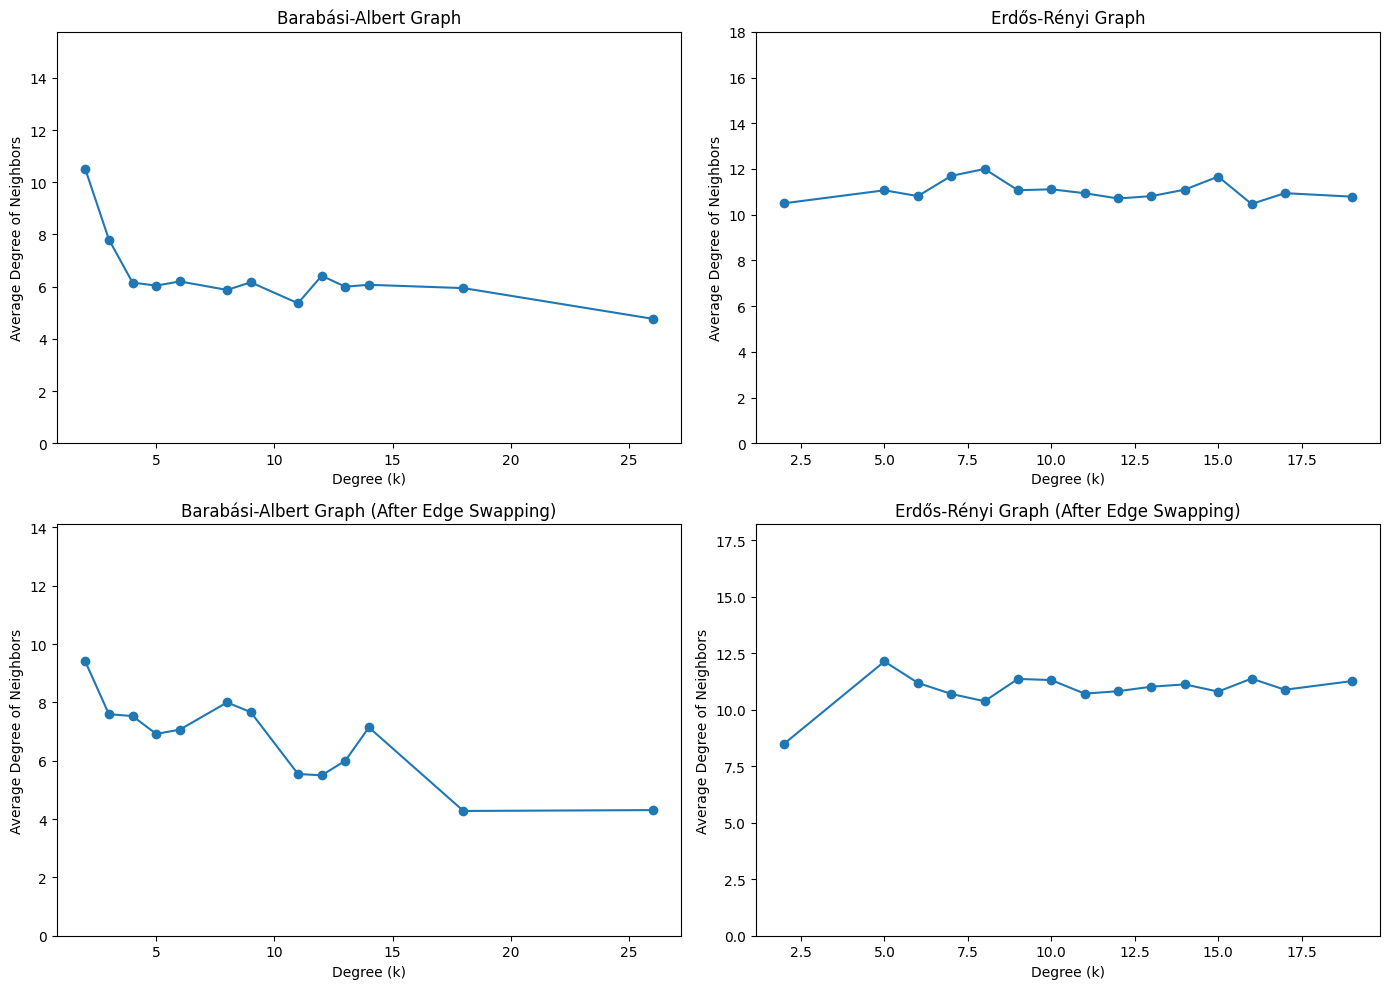

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the average degree of neighbors for nodes of a given degree k
def average_degree(G, k):
    nodes_with_degree_k = [node for node, degree in G.degree if degree == k]
    if not nodes_with_degree_k:
        return np.nan
    neighbor_degrees = []
    for node in nodes_with_degree_k:
        neighbor_degrees.extend([G.degree[neighbor] for neighbor in G.neighbors(node)])
    if not neighbor_degrees:
        return np.nan
    return np.mean(neighbor_degrees)

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Barabási-Albert graph (Scale-Free Network)
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
G1 = nx.barabasi_albert_graph(n, m)

unique_degrees = np.unique(list(dict(G1.degree).values()))
av_degrees = [average_degree(G1, k) for k in unique_degrees]

axes[0, 0].plot(unique_degrees, av_degrees, marker='o')
axes[0, 0].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[0, 0].set_title('Barabási-Albert Graph')
axes[0, 0].set_xlabel('Degree (k)')
axes[0, 0].set_ylabel('Average Degree of Neighbors')

# Erdős-Rényi graph (Random Network)
p = 0.1  # Probability of edge creation
G2 = nx.erdos_renyi_graph(n, p)

unique_degrees = np.unique(list(dict(G2.degree).values()))
av_degrees = [average_degree(G2, k) for k in unique_degrees]

axes[0, 1].plot(unique_degrees, av_degrees, marker='o')
axes[0, 1].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[0, 1].set_title('Erdős-Rényi Graph')
axes[0, 1].set_xlabel('Degree (k)')
axes[0, 1].set_ylabel('Average Degree of Neighbors')

# Random edge switching for the Barabási-Albert graph
G1_swapped = nx.algorithms.swap.double_edge_swap(G1.copy(), nswap=len(G1.edges) * 2, max_tries=len(G1.edges) * 5)
unique_degrees_swapped = np.unique(list(dict(G1_swapped.degree).values()))
av_degrees_swapped = [average_degree(G1_swapped, k) for k in unique_degrees_swapped]

axes[1, 0].plot(unique_degrees_swapped, av_degrees_swapped, marker='o')
axes[1, 0].set_ylim(0, np.nanmax(av_degrees_swapped) * 1.5)
axes[1, 0].set_title('Barabási-Albert Graph (After Edge Swapping)')
axes[1, 0].set_xlabel('Degree (k)')
axes[1, 0].set_ylabel('Average Degree of Neighbors')

# Random edge switching for the Erdős-Rényi graph
G2_swapped = nx.algorithms.swap.double_edge_swap(G2.copy(), nswap=len(G2.edges) * 2, max_tries=len(G2.edges) * 5)
unique_degrees_swapped = np.unique(list(dict(G2_swapped.degree).values()))
av_degrees_swapped = [average_degree(G2_swapped, k) for k in unique_degrees_swapped]

axes[1, 1].plot(unique_degrees_swapped, av_degrees_swapped, marker='o')
axes[1, 1].set_ylim(0, np.nanmax(av_degrees_swapped) * 1.5)
axes[1, 1].set_title('Erdős-Rényi Graph (After Edge Swapping)')
axes[1, 1].set_xlabel('Degree (k)')
axes[1, 1].set_ylabel('Average Degree of Neighbors')

plt.tight_layout()
plt.show()


In [45]:
!pip install networkit

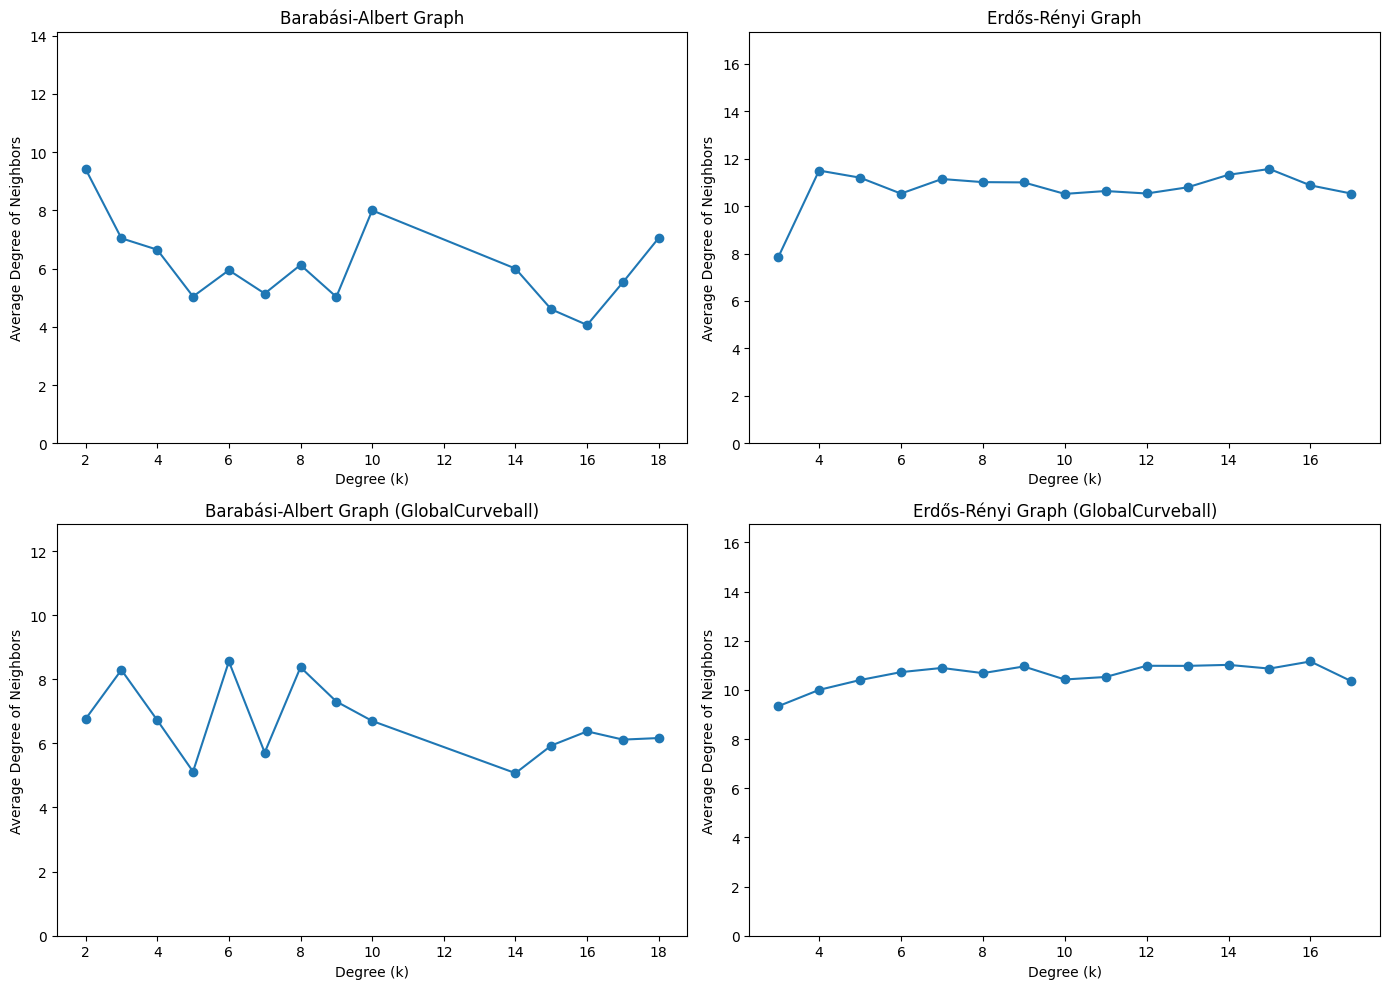

In [46]:
import networkx as nx
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the average degree of neighbors for nodes of a given degree k
def average_degree(G, k):
    nodes_with_degree_k = [node for node, degree in G.degree if degree == k]
    if not nodes_with_degree_k:
        return np.nan
    neighbor_degrees = []
    for node in nodes_with_degree_k:
        neighbor_degrees.extend([G.degree[neighbor] for neighbor in G.neighbors(node)])
    if not neighbor_degrees:
        return np.nan
    return np.mean(neighbor_degrees)

# Function to perform global edge switching using Networkit
def random_switch_graph(G):
    # Convert the NetworkX graph to a Networkit graph
    nk_graph = nk.nxadapter.nx2nk(G)
    
    # Perform the GlobalCurveball algorithm
    global_curve = nk.randomization.GlobalCurveball(nk_graph, number_of_global_rounds=100)
    global_curve.run()
    
    # Convert the resulting Networkit graph back to NetworkX for visualization
    H_nx = nk.nxadapter.nk2nx(global_curve.getGraph())
    return H_nx

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Barabási-Albert graph (Scale-Free Network)
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
G1 = nx.barabasi_albert_graph(n, m)

unique_degrees = np.unique(list(dict(G1.degree).values()))
av_degrees = [average_degree(G1, k) for k in unique_degrees]

axes[0, 0].plot(unique_degrees, av_degrees, marker='o')
axes[0, 0].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[0, 0].set_title('Barabási-Albert Graph')
axes[0, 0].set_xlabel('Degree (k)')
axes[0, 0].set_ylabel('Average Degree of Neighbors')

# Erdős-Rényi graph (Random Network)
p = 0.1  # Probability of edge creation
G2 = nx.erdos_renyi_graph(n, p)

unique_degrees = np.unique(list(dict(G2.degree).values()))
av_degrees = [average_degree(G2, k) for k in unique_degrees]

axes[0, 1].plot(unique_degrees, av_degrees, marker='o')
axes[0, 1].set_ylim(0, np.nanmax(av_degrees) * 1.5)
axes[0, 1].set_title('Erdős-Rényi Graph')
axes[0, 1].set_xlabel('Degree (k)')
axes[0, 1].set_ylabel('Average Degree of Neighbors')

# Perform the custom edge switching with GlobalCurveball on the Barabási-Albert graph
G1_swapped = random_switch_graph(G1)
unique_degrees_swapped = np.unique(list(dict(G1_swapped.degree).values()))
av_degrees_swapped = [average_degree(G1_swapped, k) for k in unique_degrees_swapped]

axes[1, 0].plot(unique_degrees_swapped, av_degrees_swapped, marker='o')
axes[1, 0].set_ylim(0, np.nanmax(av_degrees_swapped) * 1.5)
axes[1, 0].set_title('Barabási-Albert Graph (GlobalCurveball)')
axes[1, 0].set_xlabel('Degree (k)')
axes[1, 0].set_ylabel('Average Degree of Neighbors')

# Perform the custom edge switching with GlobalCurveball on the Erdős-Rényi graph
G2_swapped = random_switch_graph(G2)
unique_degrees_swapped = np.unique(list(dict(G2_swapped.degree).values()))
av_degrees_swapped = [average_degree(G2_swapped, k) for k in unique_degrees_swapped]

axes[1, 1].plot(unique_degrees_swapped, av_degrees_swapped, marker='o')
axes[1, 1].set_ylim(0, np.nanmax(av_degrees_swapped) * 1.5)
axes[1, 1].set_title('Erdős-Rényi Graph (GlobalCurveball)')
axes[1, 1].set_xlabel('Degree (k)')
axes[1, 1].set_ylabel('Average Degree of Neighbors')

plt.tight_layout()
plt.show()


In [55]:
import networkx as nx
import networkit as nk

# Function to perform global edge switching using Networkit
def random_switch_graph(G):
    # Convert the NetworkX graph to a Networkit graph
    nk_graph = nk.nxadapter.nx2nk(G)
    
    # Perform the GlobalCurveball algorithm
    global_curve = nk.randomization.GlobalCurveball(nk_graph, number_of_global_rounds=100)
    global_curve.run()
    
    # Convert the resulting Networkit graph back to NetworkX for visualization
    H_nx = nk.nxadapter.nk2nx(global_curve.getGraph())
    return H_nx

# Create the Barabási-Albert graph
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
G1 = nx.barabasi_albert_graph(n, m)

# Calculate and print Pearson correlation coefficient (used for assortativity)
correlation_before = nx.degree_pearson_correlation_coefficient(G1)
print('Pearson correlation coefficient Barabási-Albert (before edge switching):', correlation_before)

# Check if the correlation shows assortativity or dissortativity
if correlation_before > 0:
    print('Assortativity Barabási-Albert (before edge switching): Positive correlation')
else:
    print('Dissortativity Barabási-Albert (before edge switching): Negative correlation')

# Perform the custom edge switching with GlobalCurveball
G1_swapped = random_switch_graph(G1)

# Calculate and print Pearson correlation coefficient after edge switching
correlation_after = nx.degree_pearson_correlation_coefficient(G1_swapped)
print('Pearson correlation coefficient Barabási-Albert (after edge switching):', correlation_after)

# Check if the correlation shows assortativity or dissortativity
if correlation_after > 0:
    print('Assortativity Barabási-Albert (after edge switching): Positive correlation')
else:
    print('Dissortativity Barabási-Albert (after edge switching): Negative correlation')

# Create the Erdős-Rényi graph
p = 0.1  # Probability of edge creation
G2 = nx.erdos_renyi_graph(n, p)

# Calculate and print Pearson correlation coefficient for Erdős-Rényi before edge switching
correlation_before_er = nx.degree_pearson_correlation_coefficient(G2)
print('Pearson correlation coefficient for Erdős-Rényi (before edge switching):', correlation_before_er)

# Check if the correlation shows assortativity or dissortativity
if correlation_before_er > 0:
    print('Assortativity for Erdős-Rényi (before edge switching): Positive correlation')
else:
    print('Dissortativity for Erdős-Rényi (before edge switching): Negative correlation')

# Perform the custom edge switching with GlobalCurveball for Erdős-Rényi
G2_swapped = random_switch_graph(G2)

# Calculate and print Pearson correlation coefficient for Erdős-Rényi after edge switching
correlation_after_er = nx.degree_pearson_correlation_coefficient(G2_swapped)
print('Pearson correlation coefficient for Erdős-Rényi (after edge switching):', correlation_after_er)

# Check if the correlation shows assortativity or dissortativity
if correlation_after_er > 0:
    print('Assortativity for Erdős-Rényi (after edge switching): Positive correlation')
else:
    print('Dissortativity for Erdős-Rényi (after edge switching): Negative correlation')


Pearson correlation coefficient Barabási-Albert (before edge switching): -0.15188459577881047
Dissortativity Barabási-Albert (before edge switching): Negative correlation
Pearson correlation coefficient Barabási-Albert (after edge switching): -0.18814045403133905
Dissortativity Barabási-Albert (after edge switching): Negative correlation
Pearson correlation coefficient for Erdős-Rényi (before edge switching): -0.03403371880777015
Dissortativity for Erdős-Rényi (before edge switching): Negative correlation
Pearson correlation coefficient for Erdős-Rényi (after edge switching): -0.04875386592176599
Dissortativity for Erdős-Rényi (after edge switching): Negative correlation


In [48]:
import pandas as pd
def load_starwars_data():
    dataset_nodes = pd.read_csv('data/starwars-characters.csv')
    dataset_edges = pd.read_csv('data/starwars-links.csv')
    
    G_starwars = nx.Graph()
    for _, node in dataset_nodes.iterrows():
        G_starwars.add_node(node['number'], label=node['name'])
    for _, edge in dataset_edges.iterrows():
        G_starwars.add_edge(edge['character1'], edge['character2'], weight=edge['scenes'])
    
    return G_starwars

# Load and create the football graph from a .net file
def read_net_file(filepath):
    G = nx.DiGraph()
    vertices_section = False
    arcs_section = False
    
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if "*Vertices" in line:
                vertices_section = True
                arcs_section = False
                continue
            elif "*Arcs" in line:
                vertices_section = False
                arcs_section = True
                continue
            if vertices_section:
                parts = line.split()
                if len(parts) >= 4:
                    node_id = int(parts[0])
                    label = parts[1].strip('"')
                    x, y = float(parts[2]), float(parts[3])
                    G.add_node(node_id, label=label, x=x, y=y)
            if arcs_section:
                parts = line.split()
                if len(parts) == 3:
                    source = int(parts[0])
                    target = int(parts[1])
                    weight = int(parts[2])
                    G.add_edge(source, target, weight=weight)
    return G

# Load prisoner data from matrices
def load_prisoner_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    lines = content.splitlines()
    row_start = lines.index("ROW LABELS:") + 1
    row_labels = lines[row_start:row_start + 15]
    col_start = lines.index("COLUMN LABELS:") + 1
    col_labels = lines[col_start:col_start + 15]
    data_start = lines.index("DATA:") + 1
    matrix_data = [list(map(int, line.split())) for line in lines[data_start:data_start + 30]]
    matrix_data = np.array(matrix_data).reshape(2, 15, 15)
    
    G_prisoner_multiplex = nx.from_numpy_array(matrix_data[0])
    G_prisoner_uniplex = nx.from_numpy_array(matrix_data[1])
    
    G_prisoner_multiplex = nx.relabel_nodes(G_prisoner_multiplex, dict(enumerate(row_labels)))
    G_prisoner_uniplex = nx.relabel_nodes(G_prisoner_uniplex, dict(enumerate(row_labels)))
    
    return G_prisoner_multiplex, G_prisoner_uniplex


In [49]:
import networkx as nx
import pandas as pd


# Load and create graphs
G_starwars = load_starwars_data()
G_football = read_net_file('data/football.net')
G_prisoner_multiplex, G_prisoner_uniplex = load_prisoner_data('data/KAPFERER_MINE.dat')

In [50]:
import numpy as np
import pandas as pd
import networkx as nx
import powerlaw  # Ensure this library is installed
from random import sample

# Define the summary function
def summary(G: nx.Graph, name='') -> dict:
    # Check if the graph is directed
    directed = G.is_directed()
    
    degrees = [degree for node, degree in G.degree()]
    
    # Estimate the power-law parameter alpha using powerlaw.Fit
    try:
        fit = powerlaw.Fit(degrees, discrete=True)
        alpha = fit.alpha
    except Exception as e:
        alpha = np.nan  # Handle any potential errors during the fitting process

    # Check for directed and connectivity before calculating average shortest path length
    if directed:
        if nx.is_strongly_connected(G):
            avg_shortest_path = nx.average_shortest_path_length(G)
        else:
            avg_shortest_path = np.nan  # Not strongly connected, so not calculable
    else:
        if nx.is_connected(G):
            avg_shortest_path = nx.average_shortest_path_length(G)
        else:
            avg_shortest_path = "disconnected"  # Not connected, so not calculable

    return {
        'name': name,
        'directed': directed,
        'Node Number': len(G.nodes),
        'Edge Number': len(G.edges),
        '<k>Average Degree': np.mean(degrees),
        'Power Law Alpha': alpha,  # Power-law parameter alpha
        'l Mean Distance': avg_shortest_path,
        'r Correlation Coefficient': nx.degree_pearson_correlation_coefficient(G)
    }

# Function to create a version of a graph with randomly swapped edges
def random_edge_swap(G: nx.Graph, num_swaps: int) -> nx.Graph:
    G_swapped = G.copy()
    nx.double_edge_swap(G_swapped, nswap=num_swaps, max_tries=num_swaps * 10)
    return G_swapped

# Create Barabási–Albert and Erdős–Rényi graphs
N = 100  # Number of nodes
m = 3    # Number of edges to attach from a new node in Barabási–Albert graph
p = 0.05 # Probability for edge creation in Erdős–Rényi graph

G_ba = nx.barabasi_albert_graph(N, m)
G_ba_swapped = random_edge_swap(G_ba, num_swaps=10)

G_er = nx.erdos_renyi_graph(N, p)
G_er_swapped = random_edge_swap(G_er, num_swaps=10)

# Update graphs list and include new graphs
graphs = [
    {'G': G_starwars, 'name': 'Star Wars Network'},
    {'G': G_football, 'name': 'Football Network'},
    {'G': G_prisoner_multiplex, 'name': 'Prisoner Multiplex Network'},
    {'G': G_prisoner_uniplex, 'name': 'Prisoner Uniplex Network'},
    {'G': G_ba, 'name': 'Barabási–Albert Network'},
    {'G': G_ba_swapped, 'name': 'Barabási–Albert Network (Swapped Edges)'},
    {'G': G_er, 'name': 'Erdős–Rényi Network'},
    {'G': G_er_swapped, 'name': 'Erdős–Rényi Network (Swapped Edges)'}
]

# Generate summary data for each graph and create a DataFrame
summary_df = pd.DataFrame([summary(**kwargs) for kwargs in graphs])

summary_df


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


,name,directed,Node Number,Edge Number,<k>Average Degree,Power Law Alpha,l Mean Distance,r Correlation Coefficient
0,Star Wars Network,False,111,444,8.000000,2.183838,disconnected,-0.208629
1,Football Network,True,35,118,6.742857,3.115784,NaN,-0.197589
2,Prisoner Multiplex Network,False,15,19,2.533333,2.278295,disconnected,-0.143519
3,Prisoner Uniplex Network,False,15,25,3.333333,4.934429,2.238095,-0.358209
4,Barabási–Albert Network,False,100,291,5.820000,2.517892,2.586465,-0.177265
5,Barabási–Albert Network (Swapped Edges),False,100,291,5.820000,2.517892,2.601818,-0.149036
6,Erdős–Rényi Network,False,100,246,4.920000,6.833735,3.08202,-0.038038
7,Erdős–Rényi Network (Swapped Edges),False,100,246,4.920000,6.833735,3.078586,-0.066093


In [51]:
import requests
url = "https://sites.google.com/oakland.edu/grossman/home/the-erdoes-number-project/the-erdoes-number-project-data-files/erdos1?authuser=0"
import requests
from bs4 import BeautifulSoup


try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    
    # Parse the page content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all elements with the class "CDt4Ke zfr3Q"
    elements = soup.find_all(class_="CDt4Ke zfr3Q")
    
    # Extract and save the text content
    with open("extracted_content.txt", "w", encoding="utf-8") as file:
        for element in elements:
            file.write(element.get_text() + '\n')
    
    print("Content extracted and saved successfully to extracted_content.txt")

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")



Content extracted and saved successfully to extracted_content.txt


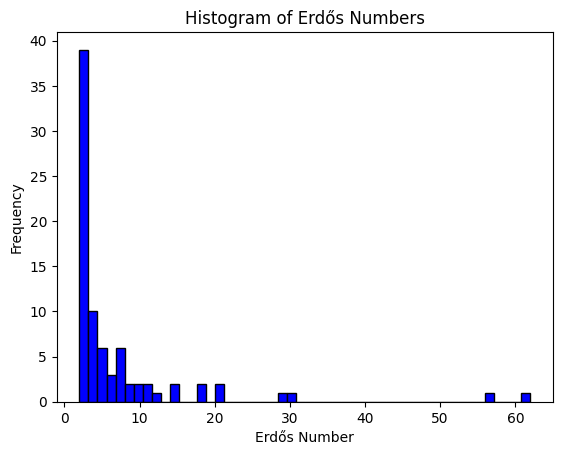

In [58]:
import re
import matplotlib.pyplot as plt

file_path = './extracted_content.txt'

# Function to parse Erdős numbers from the data
def extract_erdos_numbers(file_path):
    erdos_number_pattern = re.compile(r"(\w+, \w+(?: \(\w+\))?\*?)\s+\d{4}:\s+(\d+)")
    erdos_numbers = []

    with open(file_path, 'r') as file:
        for line in file:
            match = erdos_number_pattern.search(line)
            if match:
                name = match.group(1).strip()
                erdos_number = int(match.group(2))
                erdos_numbers.append((name, erdos_number))

    return erdos_numbers

# Extract Erdős numbers from the provided data file
erdos_numbers = extract_erdos_numbers(file_path)

# Display a histogram of all Erdős numbers
plt.hist([x[1] for x in erdos_numbers], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Erdős Numbers')
plt.xlabel('Erdős Number')
plt.ylabel('Frequency')
plt.show()


# https://oracleofbacon.org/onecenter.php

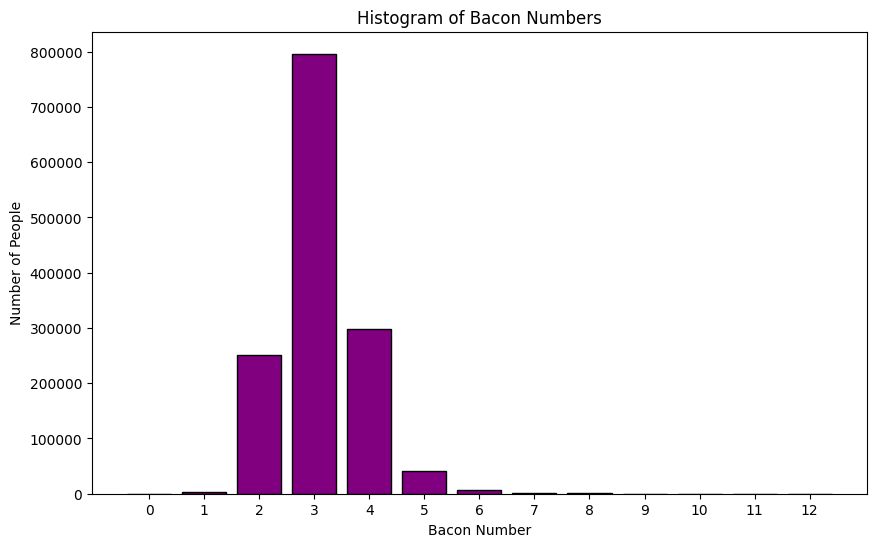

In [59]:
import matplotlib.pyplot as plt

# Data extracted from the provided image
bacon_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
number_of_people = [1, 2365, 250859, 796181, 298664, 40984, 6883, 1688, 583, 235, 68, 21, 2]

# Create histogram using the data
plt.figure(figsize=(10, 6))
plt.bar(bacon_numbers, number_of_people, color='purple', edgecolor='black')
plt.title('Histogram of Bacon Numbers')
plt.xlabel('Bacon Number')
plt.ylabel('Number of People')
plt.xticks(bacon_numbers)
plt.show()
